In [1]:
import pandas as pd

# Load the dataset
file_path = 'pollution_2000_2023.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Missing Values": data.isnull().sum(),
    "Data Types": data.dtypes
}

data_info


{'Shape': (665414, 22),
 'Columns': ['Unnamed: 0',
  'Date',
  'Address',
  'State',
  'County',
  'City',
  'O3 Mean',
  'O3 1st Max Value',
  'O3 1st Max Hour',
  'O3 AQI',
  'CO Mean',
  'CO 1st Max Value',
  'CO 1st Max Hour',
  'CO AQI',
  'SO2 Mean',
  'SO2 1st Max Value',
  'SO2 1st Max Hour',
  'SO2 AQI',
  'NO2 Mean',
  'NO2 1st Max Value',
  'NO2 1st Max Hour',
  'NO2 AQI'],
 'Missing Values': Unnamed: 0           0
 Date                 0
 Address              0
 State                0
 County               0
 City                 0
 O3 Mean              0
 O3 1st Max Value     0
 O3 1st Max Hour      0
 O3 AQI               0
 CO Mean              0
 CO 1st Max Value     0
 CO 1st Max Hour      0
 CO AQI               0
 SO2 Mean             0
 SO2 1st Max Value    0
 SO2 1st Max Hour     0
 SO2 AQI              0
 NO2 Mean             0
 NO2 1st Max Value    0
 NO2 1st Max Hour     0
 NO2 AQI              0
 dtype: int64,
 'Data Types': Unnamed: 0             int64
 Date  

In [2]:
# Step 1: Drop the unnecessary 'Unnamed: 0' column
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Step 2: Convert 'Date' to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Step 3: Check and remove duplicates
initial_row_count = data_cleaned.shape[0]
data_cleaned = data_cleaned.drop_duplicates()
duplicates_removed = initial_row_count - data_cleaned.shape[0]

# Step 4: Describe numerical columns to identify potential outliers
numerical_summary = data_cleaned.describe()

# Output the results
{
    "Duplicates Removed": duplicates_removed,
    "Numerical Summary": numerical_summary
}


{'Duplicates Removed': 1739,
 'Numerical Summary':                                 Date        O3 Mean  O3 1st Max Value  \
 count                         663675  663675.000000     663675.000000   
 mean   2012-06-18 06:40:29.139564032       0.028605          0.038988   
 min              2000-01-01 00:00:00      -0.000706          0.000000   
 25%              2007-02-17 00:00:00       0.019824          0.029000   
 50%              2012-11-17 00:00:00       0.028353          0.038000   
 75%              2018-02-07 00:00:00       0.036882          0.048000   
 max              2023-09-30 00:00:00       0.107353          0.140000   
 std                              NaN       0.012157          0.014917   
 
        O3 1st Max Hour         O3 AQI        CO Mean  CO 1st Max Value  \
 count    663675.000000  663675.000000  663675.000000     663675.000000   
 mean         10.766949      39.149429       0.329788          0.466171   
 min           7.000000       0.000000      -0.437500    

In [3]:
# Step 1: Replace negative values with NaN (non-physical values)
numerical_columns = [
    'O3 Mean', 'O3 1st Max Value', 'CO Mean', 'CO 1st Max Value',
    'SO2 Mean', 'SO2 1st Max Value', 'NO2 Mean', 'NO2 1st Max Value'
]
data_cleaned[numerical_columns] = data_cleaned[numerical_columns].applymap(
    lambda x: x if x >= 0 else None
)

# Step 2: Cap extreme outliers using the 99th percentile
for col in numerical_columns:
    upper_cap = data_cleaned[col].quantile(0.99)
    data_cleaned[col] = data_cleaned[col].clip(upper=upper_cap)

# Step 3: Recalculate summary statistics to verify changes
cleaned_summary = data_cleaned.describe()

cleaned_summary


/var/folders/10/sz2t1v6s6sd31748fvxdtzs00000gn/T/ipykernel_63941/1004899457.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_cleaned[numerical_columns] = data_cleaned[numerical_columns].applymap(


,Date,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,663675,663673.000000,663675.000000,663675.000000,663675.000000,661736.000000,662726.000000,663675.000000,663675.000000,646303.000000,658913.000000,663675.000000,663675.000000,662748.000000,663510.000000,663675.000000,663675.000000
mean,2012-06-18 06:40:29.139564032,0.028552,0.038899,10.766949,39.149429,0.326732,0.459680,5.929563,5.254192,1.432077,3.786787,8.865193,5.165726,11.470410,23.146106,11.588333,21.787970
min,2000-01-01 00:00:00,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007-02-17 00:00:00,0.019824,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.200000,0.600000,3.000000,0.000000,4.876190,11.000000,5.000000,10.000000
50%,2012-11-17 00:00:00,0.028353,0.038000,10.000000,35.000000,0.258333,0.300000,1.000000,3.000000,0.636364,1.400000,8.000000,1.000000,9.333333,21.000000,9.000000,20.000000
75%,2018-02-07 00:00:00,0.036882,0.048000,11.000000,44.000000,0.412500,0.600000,9.000000,7.000000,1.666667,4.000000,13.000000,6.000000,16.000000,33.000000,20.000000,31.000000
max,2023-09-30 00:00:00,0.058118,0.079000,23.000000,237.000000,1.370833,2.200000,23.000000,201.000000,11.791667,37.000000,23.000000,200.000000,40.304348,65.000000,23.000000,153.000000
std,NaN,0.012005,0.014625,3.296334,22.265966,0.249719,0.385799,7.720752,5.014410,2.118147,6.242061,6.775667,10.381727,8.666645,14.704091,7.888289,14.453261


In [4]:
# Step 1: Interpolate missing values for numerical columns
data_cleaned[numerical_columns] = data_cleaned[numerical_columns].interpolate(method='linear', limit_direction='forward')

# Step 2: Fill any remaining NaNs with column means
data_cleaned[numerical_columns] = data_cleaned[numerical_columns].fillna(data_cleaned[numerical_columns].mean())

# Verify there are no remaining missing values in numerical columns
missing_after_imputation = data_cleaned[numerical_columns].isnull().sum()

missing_after_imputation


O3 Mean              0
O3 1st Max Value     0
CO Mean              0
CO 1st Max Value     0
SO2 Mean             0
SO2 1st Max Value    0
NO2 Mean             0
NO2 1st Max Value    0
dtype: int64

In [5]:
# Step 1: Add lag features for pollutants (1-day lag)
for col in numerical_columns:
    data_cleaned[f"{col}_lag1"] = data_cleaned[col].shift(1)

# Step 2: Add pollutant ratios as derived features
data_cleaned['PM25_to_PM10_ratio'] = data_cleaned['O3 Mean'] / (data_cleaned['NO2 Mean'] + 1e-6)  # Avoid division by zero
data_cleaned['CO_to_SO2_ratio'] = data_cleaned['CO Mean'] / (data_cleaned['SO2 Mean'] + 1e-6)

# Step 3: Drop rows with NaNs introduced by lagging
data_cleaned = data_cleaned.dropna()

# Verify the newly created features
engineered_features_summary = data_cleaned[['O3 Mean_lag1', 'PM25_to_PM10_ratio', 'CO_to_SO2_ratio']].describe()

engineered_features_summary


,O3 Mean_lag1,PM25_to_PM10_ratio,CO_to_SO2_ratio
count,663674.000000,663674.000000,6.636740e+05
mean,0.028552,173.245595,1.661055e+04
std,0.012005,2530.786554,8.030019e+04
min,0.000000,0.000000,0.000000e+00
25%,0.019824,0.001473,1.730516e-01
50%,0.028353,0.003167,4.272064e-01
75%,0.036882,0.006545,1.245569e+00
max,0.058118,58118.000000,1.370833e+06


In [6]:
from sklearn.preprocessing import StandardScaler

#Initialize scaler
scaler = StandardScaler()

#Scale numerical features (including newly engineered ones)
numerical_features = numerical_columns + [
    'O3 Mean_lag1', 'PM25_to_PM10_ratio', 'CO_to_SO2_ratio'
]
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

# Verify scaling results
scaled_summary = data_cleaned[numerical_features].describe()

scaled_summary


,O3 Mean,O3 1st Max Value,CO Mean,CO 1st Max Value,SO2 Mean,SO2 1st Max Value,NO2 Mean,NO2 1st Max Value,O3 Mean_lag1,PM25_to_PM10_ratio,CO_to_SO2_ratio
count,6.636740e+05,6.636740e+05,6.636740e+05,6.636740e+05,6.636740e+05,6.636740e+05,6.636740e+05,6.636740e+05,6.636740e+05,6.636740e+05,6.636740e+05
mean,-2.262434e-16,-1.010965e-15,-6.655617e-16,3.499643e-16,5.235332e-17,1.232926e-16,5.997828e-16,-2.523452e-16,-5.991190e-16,5.866998e-18,2.057197e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.378342e+00,-2.659732e+00,-1.304621e+00,-1.189852e+00,-6.665268e-01,-6.042577e-01,-1.321437e+00,-1.573574e+00,-2.378343e+00,-6.845529e-02,-2.068558e-01
25%,-7.270558e-01,-6.768332e-01,-6.041422e-01,-6.715037e-01,-5.792375e-01,-5.078995e-01,-7.597425e-01,-8.255800e-01,-7.270534e-01,-6.845471e-02,-2.068536e-01
50%,-1.661270e-02,-6.145090e-02,-2.705822e-01,-4.123294e-01,-3.767118e-01,-3.794220e-01,-2.458170e-01,-1.455851e-01,-1.660914e-02,-6.845404e-02,-2.068505e-01
75%,6.938304e-01,6.223072e-01,3.465074e-01,3.651935e-01,9.941252e-02,3.813005e-02,5.241310e-01,6.704087e-01,6.938351e-01,-6.845270e-02,-2.068403e-01
max,2.462733e+00,2.741957e+00,4.182461e+00,4.511982e+00,4.947773e+00,5.337829e+00,3.327589e+00,2.846392e+00,2.462741e+00,2.289596e+01,1.686451e+01


In [7]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Split data into training, validation, and testing subsets
training_data = data_cleaned[data_cleaned['Date'] < '2019-01-01']
validation_data = data_cleaned[(data_cleaned['Date'] >= '2019-01-01') & (data_cleaned['Date'] < '2021-01-01')]
testing_data = data_cleaned[data_cleaned['Date'] >= '2021-01-01']

# Step 2: Initialize scaler
scaler = StandardScaler()

# Step 3: Apply scaling to numerical features
numerical_features = [
    'O3 Mean', 'O3 1st Max Value', 'CO Mean', 'CO 1st Max Value',
    'SO2 Mean', 'SO2 1st Max Value', 'NO2 Mean', 'NO2 1st Max Value',
    'O3 Mean_lag1', 'PM25_to_PM10_ratio', 'CO_to_SO2_ratio'
]

training_data[numerical_features] = scaler.fit_transform(training_data[numerical_features])
validation_data[numerical_features] = scaler.transform(validation_data[numerical_features])
testing_data[numerical_features] = scaler.transform(testing_data[numerical_features])

# Step 4: Save scaled and split datasets
training_data.to_csv('training_data.csv', index=False)
validation_data.to_csv('validation_data.csv', index=False)
testing_data.to_csv('testing_data.csv', index=False)

# Step 5: Display dataset sizes
data_split_summary = {
    "Training Data": training_data.shape,
    "Validation Data": validation_data.shape,
    "Testing Data": testing_data.shape
}

data_split_summary


/var/folders/10/sz2t1v6s6sd31748fvxdtzs00000gn/T/ipykernel_63941/1017341064.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[numerical_features] = scaler.fit_transform(training_data[numerical_features])
/var/folders/10/sz2t1v6s6sd31748fvxdtzs00000gn/T/ipykernel_63941/1017341064.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data[numerical_features] = scaler.transform(validation_data[numerical_features])
/var/folders/10/sz2t1v6s6sd31748fvxdtzs00000gn/T/ipykernel_63941/10173

{'Training Data': (525290, 31),
 'Validation Data': (62601, 31),
 'Testing Data': (75783, 31)}

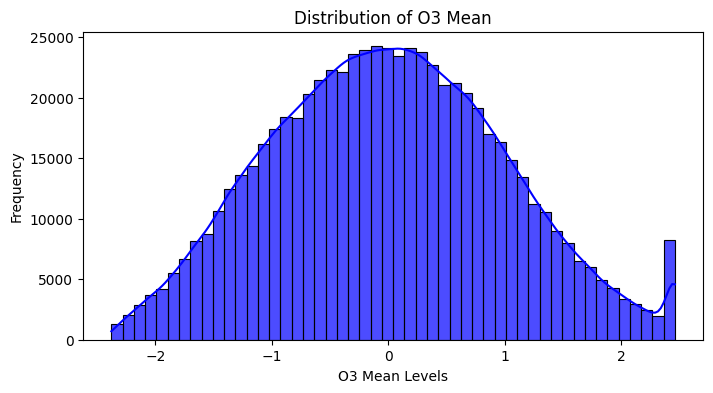

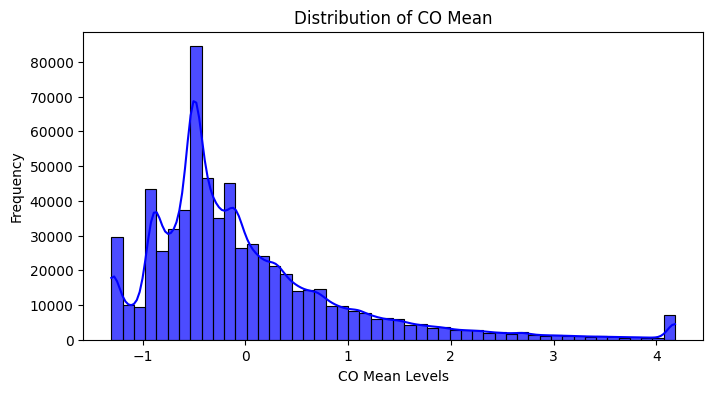

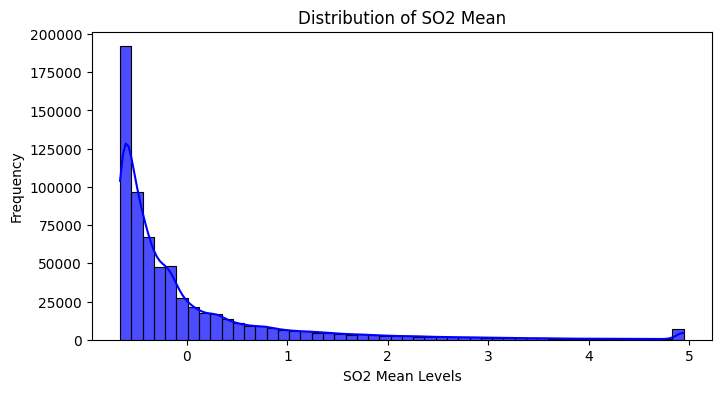

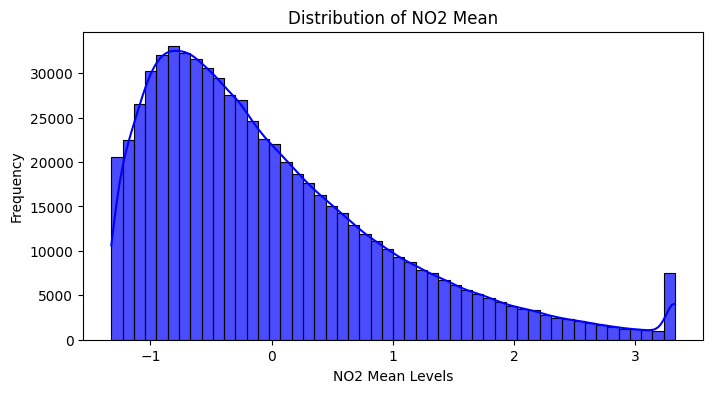

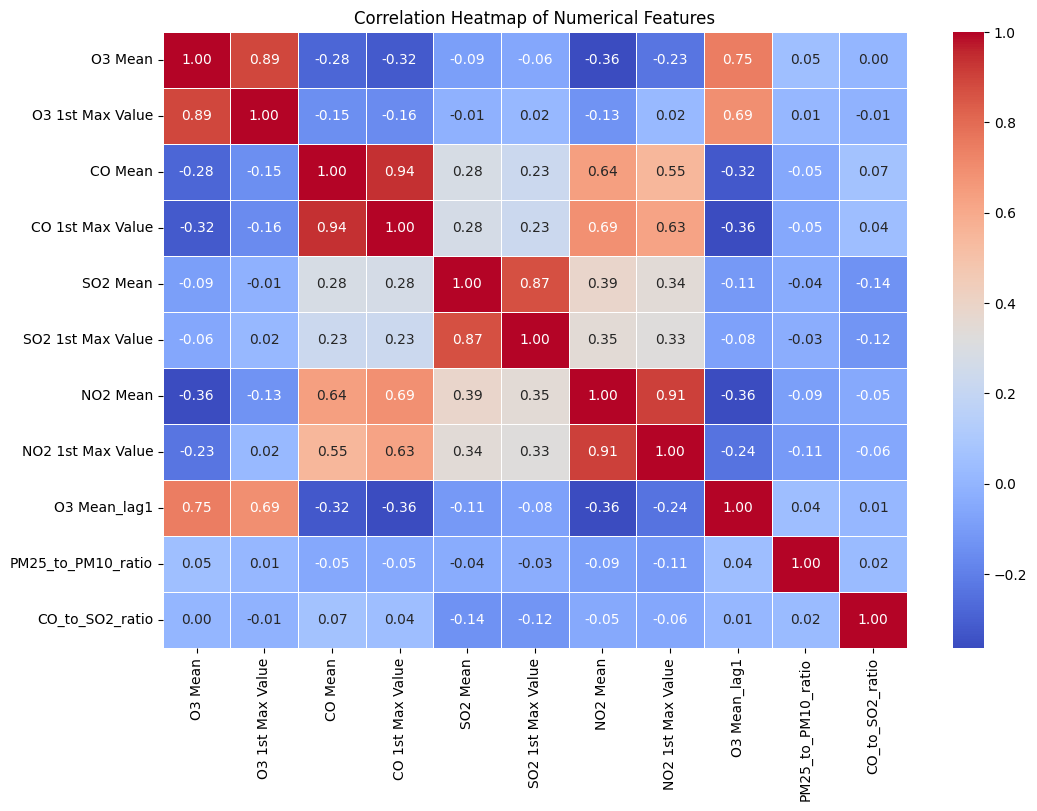

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Exploratory Data Analysis (EDA)

# Visualize the distribution of key pollutants
pollutants = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']

for pollutant in pollutants:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_cleaned[pollutant], bins=50, kde=True, color="blue", alpha=0.7)
    plt.title(f"Distribution of {pollutant}")
    plt.xlabel(f"{pollutant} Levels")
    plt.ylabel("Frequency")
    plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
corr_matrix = data_cleaned[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [9]:
# Add moving averages (e.g., 7-day rolling averages) for pollutants
for pollutant in ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']:
    data_cleaned[f"{pollutant}_7d_avg"] = data_cleaned[pollutant].rolling(window=7).mean()

# Add seasonality features (e.g., month, season)
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Season'] = data_cleaned['Month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2]
    else 'Spring' if x in [3, 4, 5]
    else 'Summer' if x in [6, 7, 8]
    else 'Fall'
)

# Encode the 'Season' feature
data_cleaned = pd.get_dummies(data_cleaned, columns=['Season'], drop_first=True)

# Drop rows with NaNs introduced by moving averages
data_cleaned = data_cleaned.dropna()

# Display the dataset structure after feature engineering
data_cleaned.head()


,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,...,PM25_to_PM10_ratio,CO_to_SO2_ratio,O3 Mean_7d_avg,CO Mean_7d_avg,SO2 Mean_7d_avg,NO2 Mean_7d_avg,Month,Season_Spring,Season_Summer,Season_Winter
7,2000-01-08,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,-1.447411,-1.292215,10,19,4.182461,...,-0.068455,-0.206854,-1.344491,4.008533,2.508445,2.648021,1,False,False,True
8,2000-01-09,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,-1.329795,-1.155464,10,20,4.182461,...,-0.068455,-0.206853,-1.383689,4.182461,2.817359,2.683037,1,False,False,True
9,2000-01-10,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,-1.545369,-1.634095,9,14,4.182461,...,-0.068455,-0.206854,-1.375990,4.182461,3.137609,2.675485,1,False,False,True
10,2000-01-11,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,-1.589433,-1.497343,10,16,4.182461,...,-0.068455,-0.206854,-1.452278,4.182461,3.446523,2.676201,1,False,False,True
11,2000-01-12,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,-1.604177,-1.702470,9,13,4.182461,...,-0.068455,-0.206854,-1.429181,4.182461,3.596729,2.676201,1,False,False,True


In [10]:


# Step 1: Create target variable based on percentage change in 'O3 Mean'
def categorize_change(x):
    if -5 <= x <= 5:
        return "0-5%"
    elif -10 <= x <= 10:
        return "5-10%"
    else:
        return ">10%"

data_cleaned['O3_Mean_Change'] = (
    data_cleaned['O3 Mean'].pct_change() * 100  # Calculate percentage change
).fillna(0).apply(categorize_change)  # Categorize changes

# Drop the first row with NaN from pct_change
data_cleaned = data_cleaned.dropna(subset=['O3_Mean_Change'])

# Confirm target variable distribution
target_distribution = data_cleaned['O3_Mean_Change'].value_counts()

# Display target distribution
target_distribution


O3_Mean_Change
>10%     550744
0-5%      80524
5-10%     32400
Name: count, dtype: int64

In [13]:
# Create season feature
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Season'] = data_cleaned['Month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2]
    else 'Spring' if x in [3, 4, 5]
    else 'Summer' if x in [6, 7, 8]
    else 'Fall'
)

# One-hot encode the 'Season' feature
season_encoded = pd.get_dummies(data_cleaned['Season'], prefix='Season', drop_first=False)
data_cleaned = pd.concat([data_cleaned, season_encoded], axis=1)

# Verify the one-hot encoded columns
print(data_cleaned.columns)


Index(['Date', 'Address', 'State', 'County', 'City', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Mean_lag1',
       'O3 1st Max Value_lag1', 'CO Mean_lag1', 'CO 1st Max Value_lag1',
       'SO2 Mean_lag1', 'SO2 1st Max Value_lag1', 'NO2 Mean_lag1',
       'NO2 1st Max Value_lag1', 'PM25_to_PM10_ratio', 'CO_to_SO2_ratio',
       'O3 Mean_7d_avg', 'CO Mean_7d_avg', 'SO2 Mean_7d_avg',
       'NO2 Mean_7d_avg', 'Month', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'O3_Mean_Change', 'Season', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')


In [14]:
# Filter data for NYC
nyc_data = data_cleaned[data_cleaned['City'] == 'New York']

# Split data into training, validation, and testing sets
training_data = nyc_data[nyc_data['Date'] < '2019-01-01']
validation_data = nyc_data[(nyc_data['Date'] >= '2019-01-01') & (nyc_data['Date'] < '2021-01-01')]
testing_data = nyc_data[nyc_data['Date'] >= '2021-01-01']

# Define features and target
features = [
    'O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean',
    'O3 Mean_lag1', 'PM25_to_PM10_ratio', 'CO_to_SO2_ratio',
    'Month', 'Season_Winter', 'Season_Spring', 'Season_Summer', 'Season_Fall'
]
target = 'O3_Mean_Change'

# Separate features and target
X_train = training_data[features]
y_train = training_data[target]

X_val = validation_data[features]
y_val = validation_data[target]

X_test = testing_data[features]
y_test = testing_data[target]
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Decision Tree
dt_model = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
dt_model.fit(X_train, y_train)
y_pred_val_dt = dt_model.predict(X_val)

# Random Forest
rf_model = OneVsRestClassifier(RandomForestClassifier(random_state=42, n_estimators=100))
rf_model.fit(X_train, y_train)
y_pred_val_rf = rf_model.predict(X_val)

# K-Nearest Neighbors
knn_model = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn_model.fit(X_train, y_train)
y_pred_val_knn = knn_model.predict(X_val)
# Evaluate models
models = {
    "Decision Tree": (dt_model, y_pred_val_dt),
    "Random Forest": (rf_model, y_pred_val_rf),
    "KNN": (knn_model, y_pred_val_knn)
}

for model_name, (model, y_pred_val) in models.items():
    print(f"Evaluation for {model_name}:")
    print(f"  Accuracy: {accuracy_score(y_val, y_pred_val):.2f}")
    print(f"  F1 Score: {f1_score(y_val, y_pred_val, average='weighted'):.2f}")
    print(classification_report(y_val, y_pred_val))
    print()


Evaluation for Decision Tree:
  Accuracy: 0.94
  F1 Score: 0.91
              precision    recall  f1-score   support

        0-5%       0.20      0.04      0.07        48
       5-10%       0.21      0.07      0.11        41
        >10%       0.95      1.00      0.97      1276

    accuracy                           0.94      1365
   macro avg       0.45      0.37      0.38      1365
weighted avg       0.90      0.94      0.91      1365


Evaluation for Random Forest:
  Accuracy: 0.94
  F1 Score: 0.91
              precision    recall  f1-score   support

        0-5%       1.00      0.02      0.04        48
       5-10%       0.00      0.00      0.00        41
        >10%       0.94      1.00      0.97      1276

    accuracy                           0.94      1365
   macro avg       0.65      0.34      0.34      1365
weighted avg       0.91      0.94      0.91      1365


Evaluation for KNN:
  Accuracy: 0.93
  F1 Score: 0.91
              precision    recall  f1-score   support


/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [15]:
# Test the best model (e.g., Random Forest)
y_pred_test_rf = rf_model.predict(X_test)
print("Random Forest Testing Evaluation:")
print(f"  Testing Accuracy: {accuracy_score(y_test, y_pred_test_rf):.2f}")
print(f"  Testing F1 Score: {f1_score(y_test, y_pred_test_rf, average='weighted'):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_rf))


Random Forest Testing Evaluation:
  Testing Accuracy: 0.93
  Testing F1 Score: 0.89

Classification Report:
              precision    recall  f1-score   support

        0-5%       0.00      0.00      0.00        72
       5-10%       0.00      0.00      0.00        63
        >10%       0.93      1.00      0.96      1713

    accuracy                           0.93      1848
   macro avg       0.31      0.33      0.32      1848
weighted avg       0.86      0.93      0.89      1848



/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf